### ALPG

In [1]:
import pandas as pd

df1 = pd.read_excel('../data/alpg-min.xlsx')
#print(df.head())
df1.tail()

,minutes
525595,0.000119
525596,0.000130
525597,0.000130
525598,0.000130
525599,0.000130


In [2]:
## Akumulasi menit ke jam

perjam1 = []
jdh = 60
for xx in range (0, 525600, 60):
    jum1 = df1['minutes'][xx:xx+jdh].sum()
    perjam1.append(jum1)
    #print(zz)

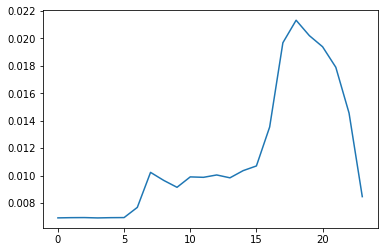

In [3]:
#kumpulkan semua yang sama jam, akumulasi, rerata
dfr1 = []
jum = 0
for yy in range (0,24):
    for xx in range (0,8760):
        if xx % 24 == yy:      # kumpulkan semua yang sama jam
            jum += perjam1[xx]  # Akumulasi

    dfr1.append(jum/365)       # rata-rata
    jum = 0
    
import matplotlib.pyplot as plt 
plt.plot(dfr1)

### LPG


In [4]:
df2 = pd.read_excel('../data/lpg-hour.xlsx')

df2.tail()

,Time,Value
8755,'31-12-2015 19:00',0.034637
8756,'31-12-2015 20:00',0.020976
8757,'31-12-2015 21:00',0.030309
8758,'31-12-2015 22:00',0.028848
8759,'31-12-2015 23:00',0.003658


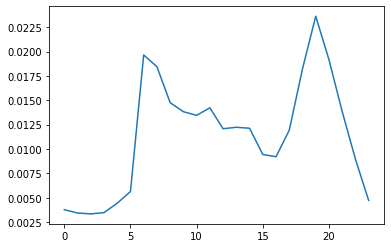

In [5]:
#kumpulkan semua yang sama jam, akumulasi, rerata

dfr2 = []
jum = 0
for yy in range (0,24):
    for xx in range (0,8760):
        if xx % 24 == yy:  # 
            jum += df2['Value'][xx]

    dfr2.append(jum/365) # rata-rata
    jum = 0
plt.plot(dfr2)

### NEDU

In [6]:
import pandas as pd

df3 = pd.read_excel('../data/NEDU-16-A1.xlsx')
#print(df.head())
df3.tail()

,Time,Value,Value2,Value3,Value4
35131,"31/12/2016 23,00,00",0.000042,0.000032,0.001074,0.004198
35132,"31/12/2016 23,15,00",0.000041,0.000032,0.001058,0.004129
35133,"31/12/2016 23,30,00",0.000041,0.000032,0.001054,0.004079
35134,"31/12/2016 23,45,00",0.000040,0.000032,0.001053,0.004029
35135,"01/01/2017 00,00,00",0.000040,0.000032,0.001048,0.004029


In [7]:
## Akumulasi per 15 menit ke jam

perjam2 = []
yy = 4
for xx in range (0, len(df3), yy):
    jum = df3['Value4'][xx:xx+yy].sum()
    perjam2.append(jum)
    #print(zz)

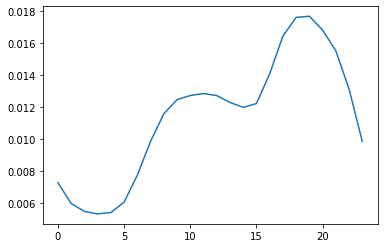

In [8]:
#kumpulkan semua yang sama jam, akumulasi, rerata
dfr3 = []
jum = 0
for yy in range (0,24):
    for xx in range (0,8760):
        if xx % 24 == yy:      # kumpulkan semua yang sama jam
            jum += perjam2[xx]  # Akumulasi

    dfr3.append(jum/365)       # rata-rata
    jum = 0
    
import matplotlib.pyplot as plt 
plt.plot(dfr3)

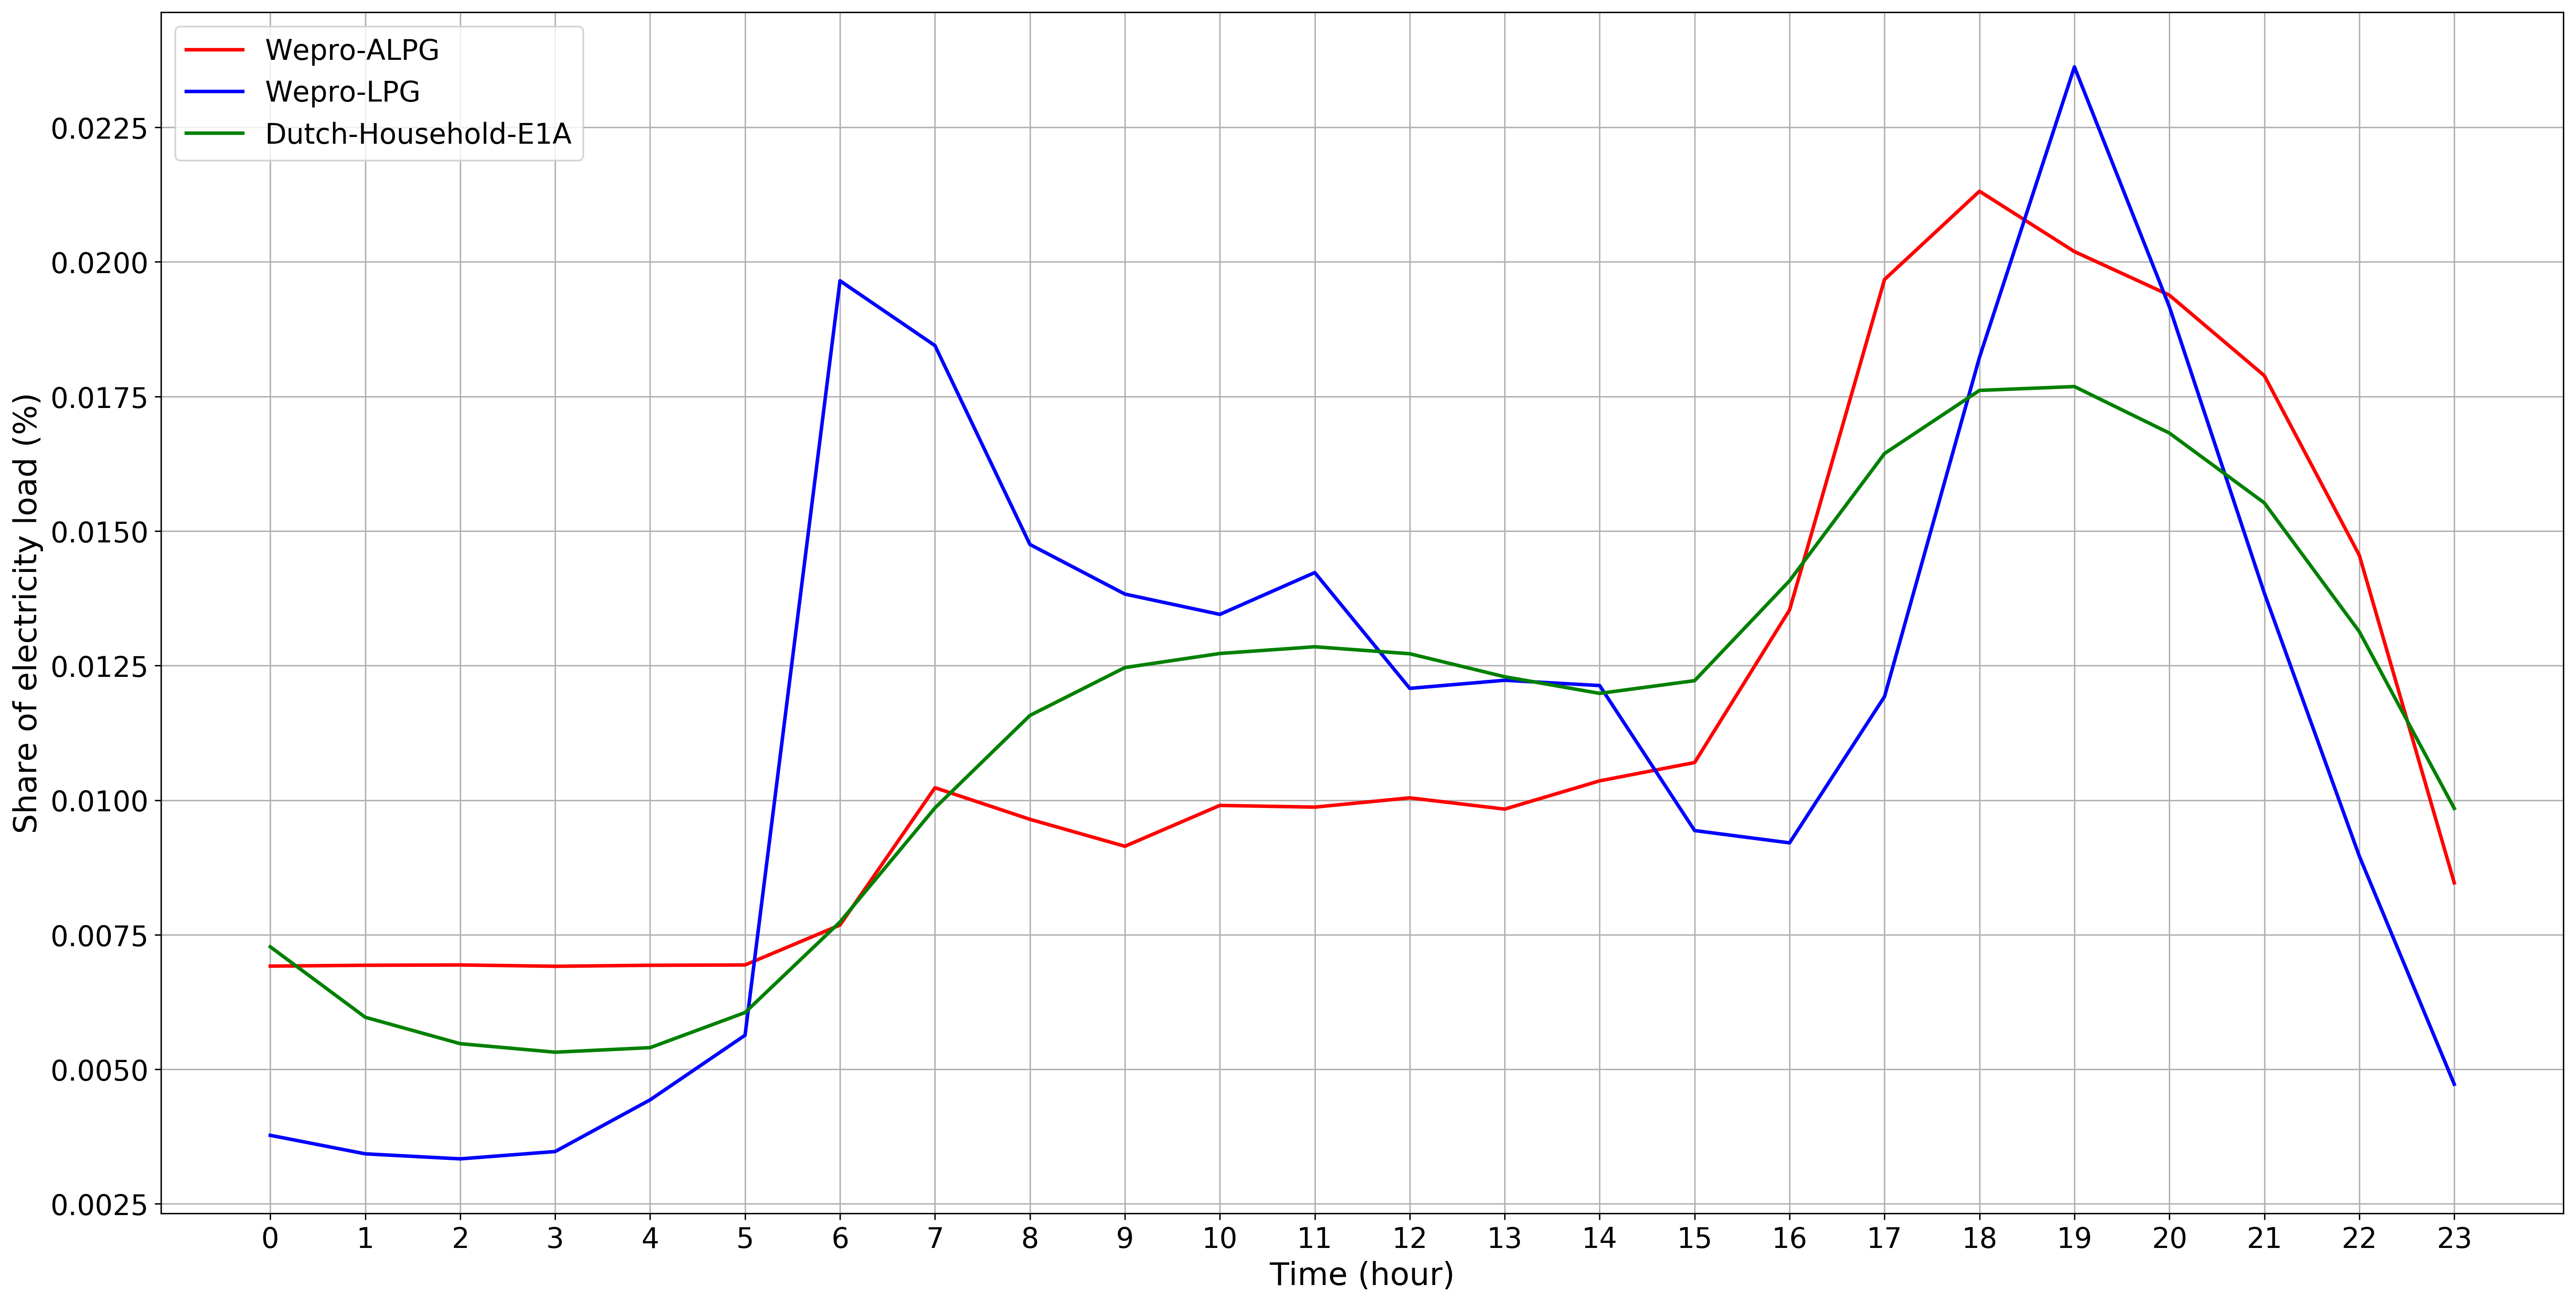

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(20,10), dpi=300)
fig.subplots_adjust(bottom=0.025, left=0.025, top = 0.975, right=0.975)

plt.subplot(1,1,1)
plt.gca().grid(True)
plt.plot(dfr1, color="red", linewidth=2, label="Wepro-ALPG")
plt.plot(dfr2, color="blue", linewidth=2, label="Wepro-LPG")
plt.plot(dfr3, color="green", linewidth=2, label="Dutch-Household-E1A")
plt.legend(loc='upper left', fontsize=16, frameon=True)
plt.ylabel('Share of electricity load (%)', fontsize=18)    
plt.xlabel('Time (hour)', fontsize=18)
plt.xticks(range(24))
plt.tick_params(which='both',labelbottom=True, labelsize=16)


plt.savefig('ALPG-LPG-NEDU Average2.png', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', papertype='legal', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.5)

plt.show()